<a href="https://colab.research.google.com/github/JihyoGwon/PythonforDataAnalysis/blob/master/001_1_Kaggle_Titanic_Colab_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. 시작하기

### 0.1 References

*   [(Titanic)타이타닉 생존자 예측(1)](https://shinejay.tistory.com/4)
*   [L1_판다스 기초: import/파일불러오기/데이터탐색](https://m.blog.naver.com/PostView.naver?blogId=rainforest_en&logNo=222445251461&isFromSearchAddView=true)
*   [Titanic Data Science Solutions](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)

#1. 라이브러리


### 1.0 References
*   [Colab에서 라이브러리 추가](https://noapps-code.tistory.com/202)

###1.1 Required Libraries

*   numpy
*   pandas
*   matplotlib
*   seaborn

### 1.2 라이브러리 설치

In [20]:
import os, sys

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
my_path = '/content/gdrive'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/gdrive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

In [26]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###1.3 라이브러리 호출

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
#노트북 내부에 그림을 표시하도록 지정
%matplotlib inline 

In [4]:
# 구글드라이브에 저장
from google.colab import drive
drive.mount('/gdrive/', force_remount=True)

import warnings
warnings.filterwarnings('ignore')

Mounted at /gdrive/


# 2. 데이터 탐색

###2.0 불러오기

In [5]:
path = '/gdrive/My Drive/DataAnalysis/PythonforDataAnalysis/Kaggle-Data/titanic'

train = pd.read_csv(path+'/train.csv')
test = pd.read_csv(path+'/test.csv')
gender_submission = pd.read_csv(path+'/gender_submission.csv')

###2.1 데이터 info

In [17]:
train.info()
test.info()
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

### 2.2 데이터 프레임

#### 2.2.1 상위 3개 데이터

In [31]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 2.2.2 샘플 수와 컬럼 수

In [35]:
print(train.shape)

(891, 12)


#### 2.2.3 특정 열 불러오기

In [39]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [40]:
train[['Survived','Pclass']]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


#### 2.2.4 특정 행 불러오기

In [41]:
train.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [42]:
train.loc[[10,11]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.70,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.55,C103,S


#### 2.2.5 조건에 맞는 샘플 가져오기

##### 예시1: 생존한 사람의 데이터만 가져오기

*   step1. 조건 설정

In [ ]:
cond = (train['Survived'] == 1)

*   step2. 조건에 맞는 데이터 불러오기



In [55]:
train[cond]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


##### 예시2: Age와 Name 열만 출력, Age가 60세 이상, 상위 3개만 출력하는 코드 만들기



*   step1. 조건 설정



*   step2. 조건에 맞는 데이터 불러오기

In [ ]:
a = train[cond]



*   step3. age, name만 & 상위 3개 출력


In [51]:
a[['Age', 'Name']].head(3)

,Age,Name
33,66.0,"Wheadon, Mr. Edward H"
54,65.0,"Ostby, Mr. Engelhart Cornelius"
96,71.0,"Goldschmidt, Mr. George B"


##### 예시3: Age는 60세 이상, Plcass가 1등급, Sex가 female인 데이터만 가져오는 방법



*   step1. 조건설정


In [ ]:
cond_age = (train['Age'] >= 60)
cond_pclass = (train['Pclass'] == 1)
cond_sex = (train['Sex'] == 'female')



*   step2. 조건에 맞는 데이터 불러오기



In [52]:
train[cond_age & cond_pclass & cond_sex]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


##### 예시4: Age는 60세 이상이거나  Plcass가 1등급이거나 Sex가 female인 데이터만 가져오는 방법



*   step2. 조건에 맞는 데이터 불러오기



In [53]:
train[cond_age | cond_pclass | cond_sex]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#3. 기초 통계량

### 3.0 숫자형 데이터

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3.1 문자형 데이터

In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 3.2 문자형을 숫자형으로 수정

In [11]:
train['Sex_clean'] = train['Sex'].astype('category').cat.codes
test['Sex_Clean'] = test['Sex'].astype('category').cat.codes

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# 4. 시각화

###4.0 Survived 비율

AxesSubplot(0.554545,0.125;0.395455x0.755)


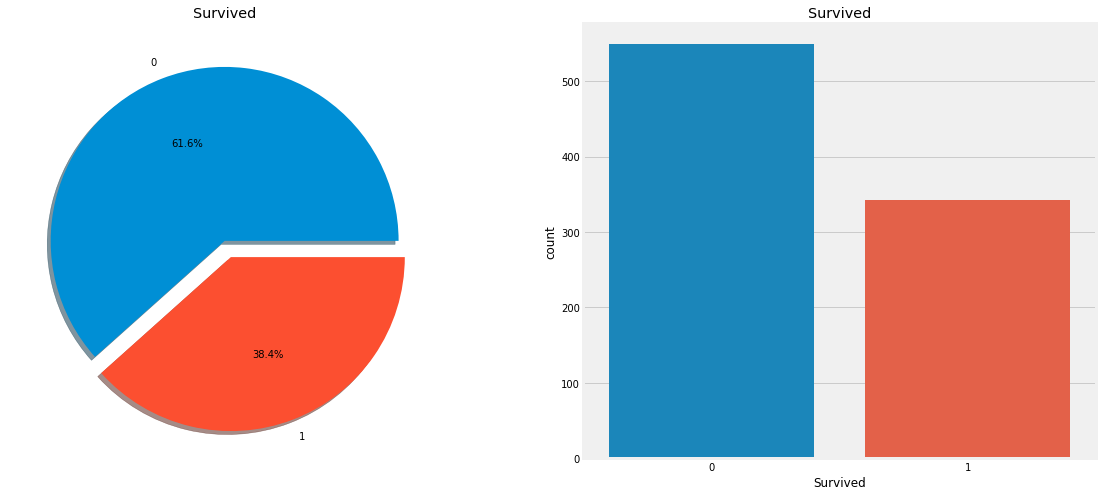

In [16]:
# fig에 1행2열로 구성된 그래프 캔버스를 넣는다.
f,ax=plt.subplots(1,2,figsize=(18,8))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')

plt.show()

### 4.1 Sex * Survived

In [13]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [24]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


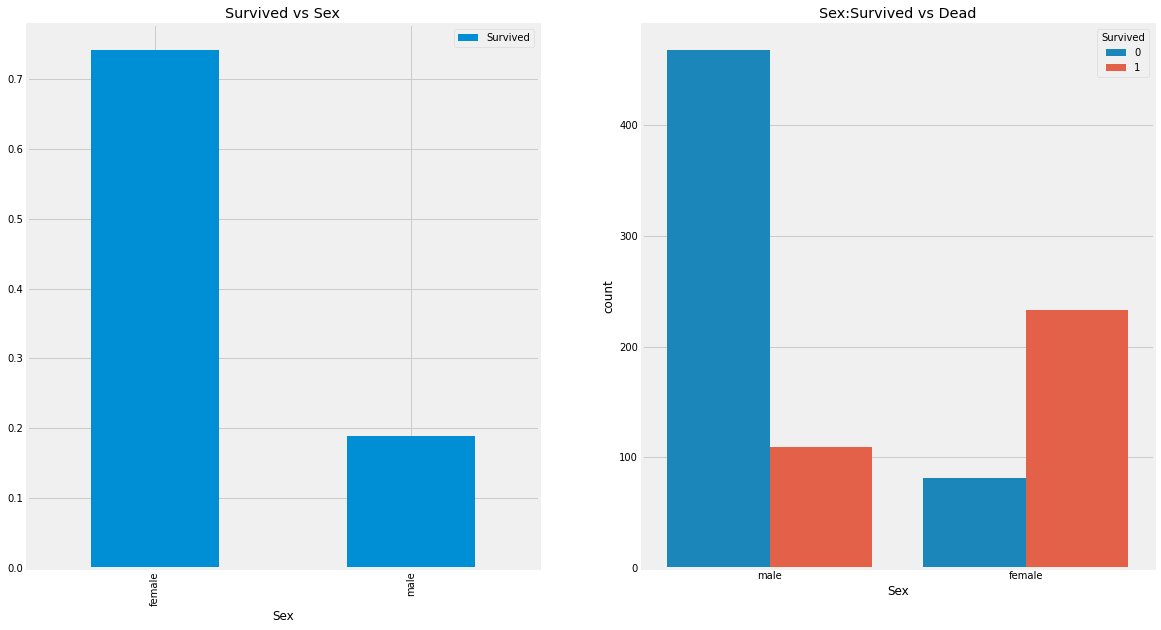

In [19]:
f,ax = plt.subplots(1,2,figsize=(18,10))

train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data = train, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

### 4.2 Pclass * Survived

In [15]:
pd.crosstab(train.Pclass, train.Survived, margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


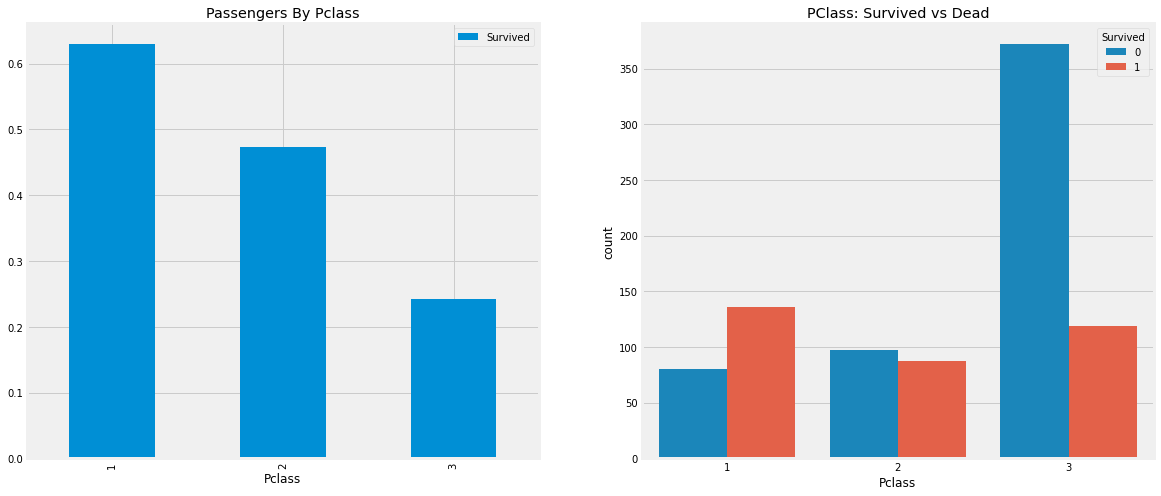

In [23]:
f,ax = plt.subplots(1,2,figsize=(18,8))

train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Passengers By Pclass')

sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('PClass: Survived vs Dead')

plt.show()

### 4.3 Sex/Pclass * Survived

In [17]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

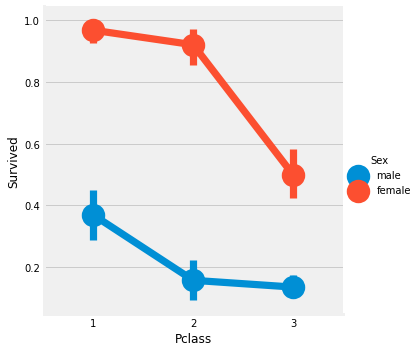

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex', data = train)
plt.show()